In [51]:
import pandas as pd
import numpy as np

In [52]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)


brands = ['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google']
models = ['A1', 'S20', 'Nord', 'Mi10', 'Pixel5']
os_versions = ['iOS 14', 'Android 10', 'Android 11', 'iOS 13', 'Android 12']
colors = ['#FF5733', '#33FFCE', '#335BFF', '#FF33B8', '#9D33FF']

n_samples = 200

data = {
    'brand': np.random.choice(brands, n_samples),
    'model': np.random.choice(models, n_samples),
    'ram_gb': np.random.choice([4, 6, 8, 12], n_samples),
    'storage_gb': np.random.choice([64, 128, 256, 512], n_samples),
    'battery_mah': np.random.randint(3000, 6000, n_samples),
    'camera_mp': np.random.choice([12, 48, 64, 108], n_samples),
    'screen_size': np.round(np.random.uniform(5.0, 6.9, n_samples), 2),
    'weight_g': np.random.randint(140, 230, n_samples),
    'cpu_speed_ghz': np.round(np.random.uniform(1.5, 3.2, n_samples), 2),
    'os_version': np.random.choice(os_versions, n_samples),

    'color_code': np.random.choice(colors, n_samples),
    'serial_id': [f"ID{1000+i}" for i in range(n_samples)],


    'price_usd': np.random.randint(200, 1200, n_samples)
}

df = pd.DataFrame(data)

df.to_csv('train.csv', index=False)

print("Sample Data:")
print(df.head())


Sample Data:
     brand model  ram_gb  storage_gb  battery_mah  camera_mp  screen_size  \
0   Xiaomi   S20      12         512         5000         12         5.47   
1   Google  Nord       8          64         5756         12         6.41   
2  OnePlus    A1       4         128         4668         12         5.06   
3   Google    A1       6         128         4893         12         6.08   
4   Google  Mi10       4         512         5818         48         6.45   

   weight_g  cpu_speed_ghz  os_version color_code serial_id  price_usd  
0       165           3.19  Android 11    #FF5733    ID1000        969  
1       168           3.03  Android 11    #FF5733    ID1001        813  
2       160           2.29      iOS 13    #FF5733    ID1002        408  
3       150           2.56      iOS 13    #FF5733    ID1003       1002  
4       179           2.77  Android 10    #9D33FF    ID1004        553  


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('train.csv')

df = df.drop(['serial_id', 'model', 'brand', 'os_version', 'color_code'], axis=1)

X = df.drop('price_usd', axis=1)
y = df['price_usd']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 228.61774999999997
R² Score: -0.12147354157169787


In [55]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

mask = selector.get_support()
selected_features = X.columns[mask]
print("Top 5 Features:", selected_features.tolist())


Top 5 Features: ['ram_gb', 'storage_gb', 'battery_mah', 'camera_mp', 'cpu_speed_ghz']


In [56]:
import numpy as np

importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print("Features ranked by importance:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


Features ranked by importance:
battery_mah: 0.2061
screen_size: 0.2056
weight_g: 0.1951
cpu_speed_ghz: 0.1876
ram_gb: 0.0782
camera_mp: 0.0706
storage_gb: 0.0568


In [57]:
import numpy as np

n_noise = 100
noise = np.random.rand(X.shape[0], n_noise)
noise_cols = [f'noise_{i}' for i in range(n_noise)]
X_noise = pd.DataFrame(noise, columns=noise_cols)

X_high_dim = pd.concat([pd.DataFrame(X, columns=X.columns), X_noise], axis=1)

X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_high_dim, y, test_size=0.2, random_state=42)

model_hd = RandomForestRegressor(n_estimators=100, random_state=42)
model_hd.fit(X_train_hd, y_train_hd)

y_pred_hd = model_hd.predict(X_test_hd)
print("\nWith noisy features:")
print("MAE:", mean_absolute_error(y_test_hd, y_pred_hd))
print("R² Score:", r2_score(y_test_hd, y_pred_hd))



With noisy features:
MAE: 213.85500000000002
R² Score: 0.10801803278311872


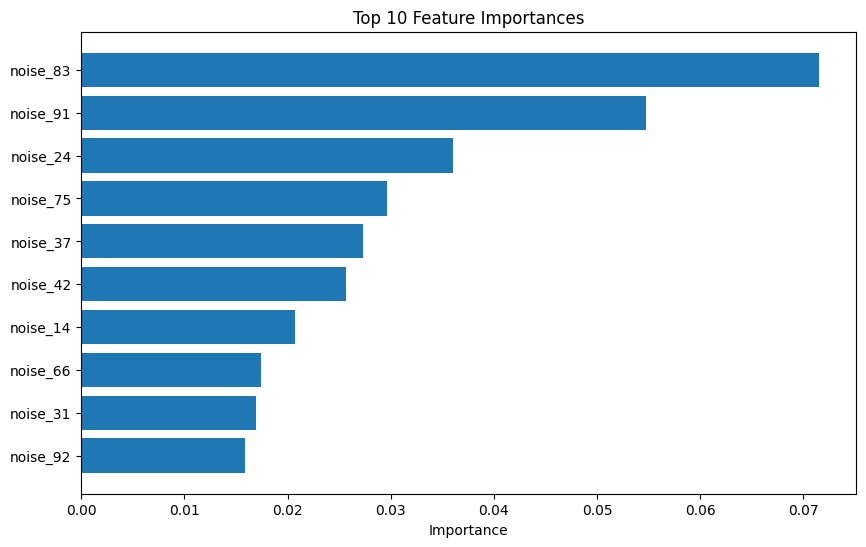

In [58]:
import matplotlib.pyplot as plt

importances_hd = model_hd.feature_importances_
indices = np.argsort(importances_hd)[-10:][::-1]
features = X_high_dim.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(features, importances_hd[indices])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()
